In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [14]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [15]:
fill_list = usedu_df.select_dtypes(include=['float64'])

usedu_df1 = usedu_df.copy()

years = usedu_df['YEAR'].unique()

for year in years:
 usedu_df1.fillna({x: usedu_df1.loc[usedu_df1["YEAR"] == year][x].mean() for x in fill_list}, inplace = True)

print (usedu_df1.isnull().sum()/usedu_df1.isnull().count())

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64


1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [6]:
usedu_df1.describe(include= 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159952e+05,8.449927e+06,6.996829e+05,3.914149e+06,3.836095e+06,8.551148e+06,4.434883e+06,...,64204.047336,63621.439535,53370.700127,5.162757e+05,2.436403e+05,7.936632e+05,224.286780,270.658534,214.910666,263.425247
std,NaN,NaN,7.393983,9.667726e+05,1.099210e+07,1.073294e+06,5.187426e+06,5.122393e+06,1.120683e+07,5.883993e+06,...,76692.599998,75393.403149,64902.978711,6.147863e+05,2.940855e+05,9.129742e+05,9.956247,8.373799,5.499181,3.931682
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,218.410116,266.360319,212.712256,263.307067
50%,NaN,NaN,2004.000000,8.204140e+05,4.572764e+06,3.286840e+05,2.122772e+06,2.187420e+06,4.653591e+06,2.454000e+06,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,218.410116,266.360319,212.712256,263.307067
75%,NaN,NaN,2011.000000,9.211780e+05,9.276958e+06,7.505032e+05,4.269811e+06,3.959033e+06,9.434922e+06,4.938820e+06,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,231.291396,274.677587,216.212825,263.307067


Average TOTAL_REVENUE is less than TOTAL_EXPENDITURE. This means that states run budget deficit on education on average.

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.


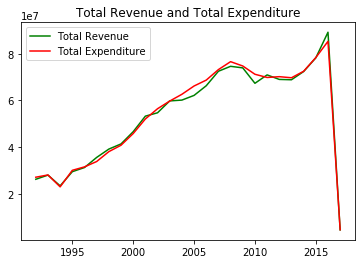

In [7]:
plt.plot(usedu_df1.loc[usedu_df1['STATE'] == 'CALIFORNIA', 'YEAR'], 
         usedu_df1.loc[usedu_df1['STATE'] == 'CALIFORNIA', 'TOTAL_REVENUE'], color='green',label='Total Revenue')

plt.plot(usedu_df1.loc[usedu_df1['STATE'] == 'CALIFORNIA', 'YEAR'], 
         usedu_df1.loc[usedu_df1['STATE'] == 'CALIFORNIA', 'TOTAL_EXPENDITURE'], color='red',label='Total Expenditure')

plt.title('Total Revenue and Total Expenditure')
plt.legend()

plt.show()

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [8]:
Avgs_Cal = pd.DataFrame({"Avg Reading 4 Score": usedu_df1.loc[usedu_df1['STATE'] == 'CALIFORNIA', 'AVG_READING_4_SCORE'], 
              "Avg Reading 8 Score": usedu_df1.loc[usedu_df1['STATE'] == 'CALIFORNIA', 'AVG_READING_8_SCORE'],
              "Avg Math 4 Score": usedu_df1.loc[usedu_df1['STATE'] == 'CALIFORNIA','AVG_MATH_4_SCORE'], 
              "Avg Math 8 Score": usedu_df1.loc[usedu_df1['STATE'] == 'CALIFORNIA','AVG_MATH_8_SCORE']})

Avgs_Cal.describe()

,Avg Reading 4 Score,Avg Reading 8 Score,Avg Math 4 Score,Avg Math 8 Score
count,26.000000,26.000000,26.000000,26.000000
mean,210.681186,262.766907,221.477216,267.627403
std,4.166145,2.999111,7.338240,3.872346
min,196.764414,254.895247,208.398961,260.892247
25%,210.161463,263.307067,218.410116,266.360319
50%,212.712256,263.307067,218.410116,266.360319
75%,212.712256,263.307067,229.389314,268.180972
max,215.421814,269.197451,234.164993,276.638200



In California, students are more successful at math than reading.

4. What are the distributions of the math and reading scores in the sample?

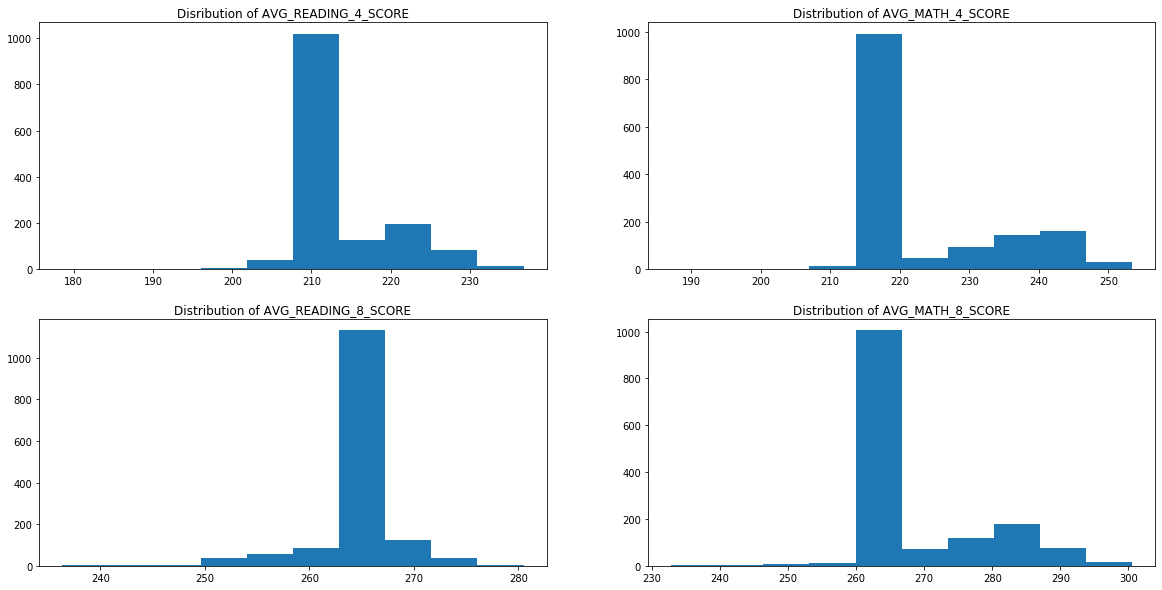

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(usedu_df1.AVG_READING_4_SCORE)
plt.title("Disribution of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(usedu_df1.AVG_MATH_4_SCORE)
plt.title("Distribution of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(usedu_df1.AVG_READING_8_SCORE)
plt.title("Distribution of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(usedu_df1.AVG_MATH_8_SCORE)
plt.title("Distribution of {}".format("AVG_MATH_8_SCORE"))
plt.show()

The distributions are not normal distributions.

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

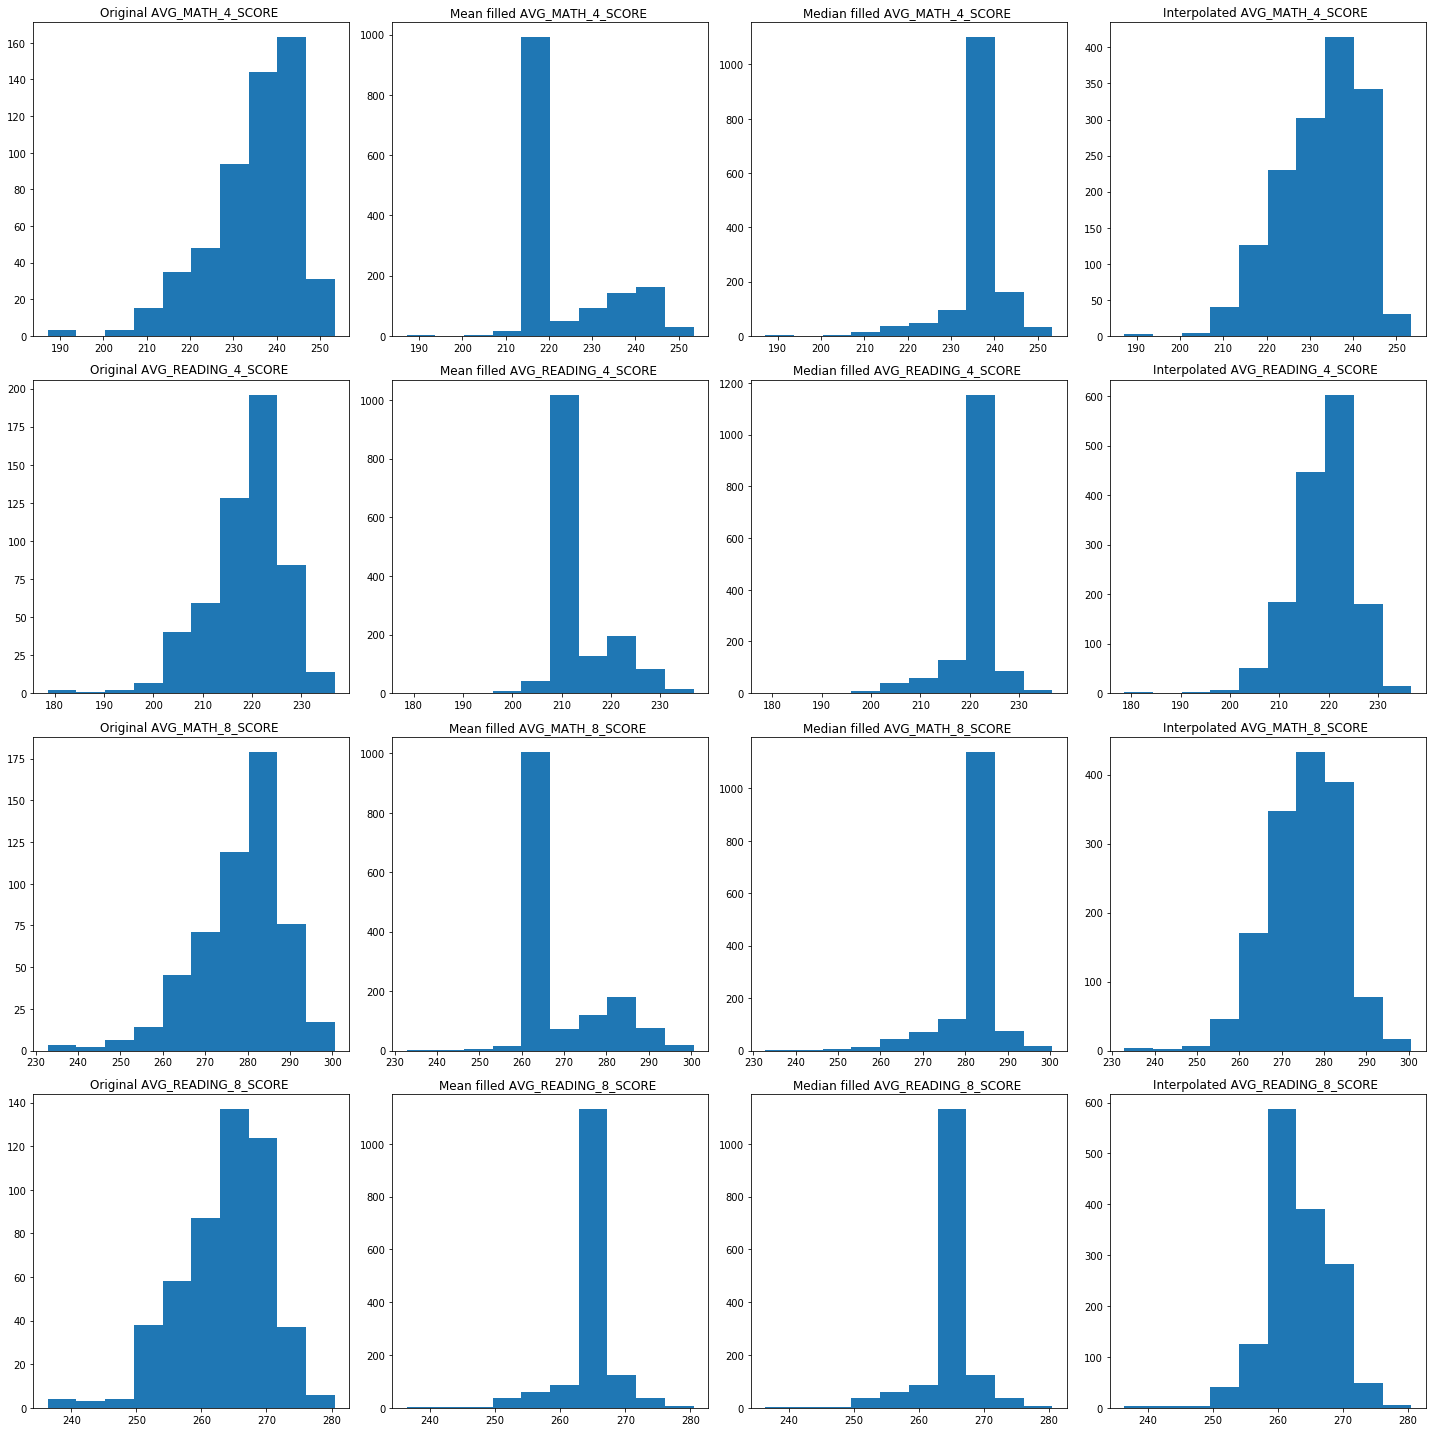

In [20]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(usedu_df.AVG_MATH_4_SCORE.dropna())
plt.title("Original {} ".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(usedu_df1.AVG_MATH_4_SCORE)
plt.title("Mean filled {} ".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(usedu_df.AVG_MATH_4_SCORE.fillna(usedu_df.AVG_MATH_4_SCORE.median()))
plt.title("Median filled {} ".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(usedu_df.AVG_MATH_4_SCORE.interpolate())
plt.title("Interpolated {} ".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(usedu_df.AVG_READING_4_SCORE.dropna())
plt.title("Original {} ".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(usedu_df1.AVG_READING_4_SCORE)
plt.title("Mean filled {} ".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,7)
plt.hist(usedu_df.AVG_READING_4_SCORE.fillna(usedu_df.AVG_READING_4_SCORE.median()))
plt.title("Median filled {} ".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(usedu_df.AVG_READING_4_SCORE.interpolate())
plt.title("Interpolated {} ".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(usedu_df.AVG_MATH_8_SCORE.dropna())
plt.title("Original {} ".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(usedu_df1.AVG_MATH_8_SCORE)
plt.title("Mean filled {} ".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(usedu_df.AVG_MATH_8_SCORE.fillna(usedu_df.AVG_MATH_8_SCORE.median()))
plt.title("Median filled {} ".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(usedu_df.AVG_MATH_8_SCORE.interpolate())
plt.title("Interpolated {} ".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(usedu_df.AVG_READING_8_SCORE.dropna())
plt.title("Original {} ".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(usedu_df1.AVG_READING_8_SCORE)
plt.title("Mean filled {} ".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(usedu_df.AVG_READING_8_SCORE.fillna(usedu_df.AVG_READING_8_SCORE.median()))
plt.title("Median filled {} ".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(usedu_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("Interpolated {} ".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

It seems better if instead of filling in the missing values with mean or median, we may fill them in using interpolation.